In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict, cross_val_score

In [22]:
df= pd.read_csv("diabetes.csv")

In [23]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
570,3,78,70,0,0,32.5,0.270,39,0
248,9,124,70,33,402,35.4,0.282,34,0
154,8,188,78,0,0,47.9,0.137,43,1
167,4,120,68,0,0,29.6,0.709,34,0
372,0,84,64,22,66,35.8,0.545,21,0


In [24]:
df.shape

(768, 9)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [93]:
df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [26]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [27]:
np.isinf(df).any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

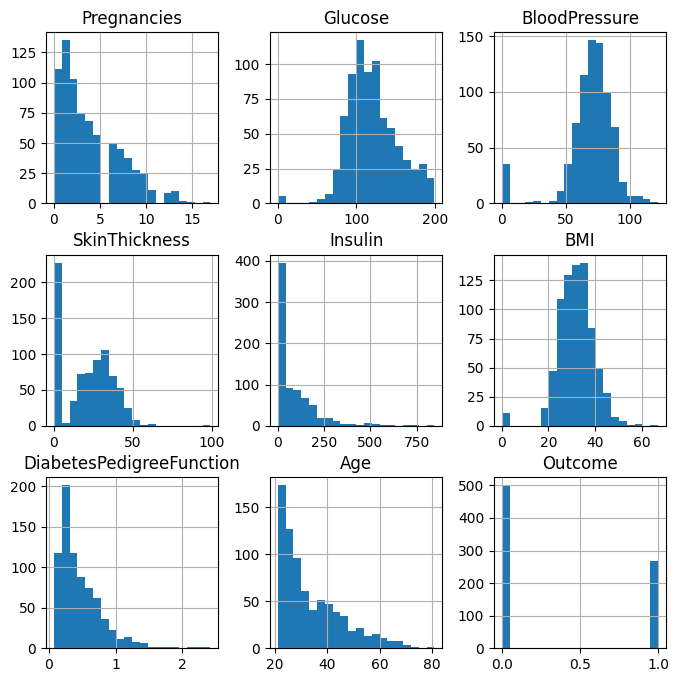

In [28]:
df.hist(bins=20, figsize=(8,8))

In [29]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

# Train-test split

In [30]:
X = df.drop(columns="Outcome", axis=1)
y = df["Outcome"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=16, stratify=y)

In [32]:
y_test.value_counts()/y_test.shape[0]

Outcome
0    0.649351
1    0.350649
Name: count, dtype: float64

In [33]:
y_train.value_counts()/y_train.shape[0]

Outcome
0    0.65123
1    0.34877
Name: count, dtype: float64

In [34]:
type(X_train)

pandas.core.frame.DataFrame

In [35]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. SVM Model

In [50]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

y_train_svm = svm_model.predict(X_train_scaled)

In [51]:
print("Training accuracy:", accuracy_score(y_train_svm, y_train))

Training accuracy: 0.7945007235890015


#### Cross-validation

In [52]:
scores = cross_val_score(svm_model,  X_train_scaled, y_train, cv=10, scoring="accuracy")
scores

array([0.84285714, 0.75362319, 0.8115942 , 0.7826087 , 0.7826087 ,
       0.73913043, 0.8115942 , 0.82608696, 0.7826087 , 0.71014493])

In [53]:
X_train_svm = cross_val_predict(svm_model, X_train_scaled, y_train, cv=10)

In [54]:
accuracy_score(X_train_svm, y_train)

0.784370477568741

In [55]:
f1_score(X_train_svm, y_train)

0.6510538641686182

#### For test dataset

In [56]:
y_test_svm = svm_model.predict(X_test_scaled)

In [57]:
print("Testing accuracy:", accuracy_score(y_test_svm, y_test))

Testing accuracy: 0.7142857142857143


In [58]:
f1_score(y_test_svm, y_test)

0.5416666666666666

# 2. Logistic Regression Model

In [85]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

y_train_pred2 = lr_model.predict(X_train_scaled)

In [86]:
print("Training accuracy:", accuracy_score(y_train_pred2, y_train))
f1_score(y_train_pred2, y_train)

Training accuracy: 0.784370477568741


0.654292343387471

#### Cross-validation

In [87]:
scores = cross_val_score(lr_model,  X_train_scaled, y_train, cv=10, scoring="accuracy")
scores

array([0.85714286, 0.75362319, 0.76811594, 0.79710145, 0.7826087 ,
       0.75362319, 0.8115942 , 0.8115942 , 0.7826087 , 0.69565217])

In [88]:
X_train_pred = cross_val_predict(lr_model, X_train_scaled, y_train, cv=10)

In [89]:
accuracy_score(X_train_pred, y_train)

0.7814761215629522

In [90]:
f1_score(X_train_pred, y_train)

0.6480186480186481

#### Test dataset

In [91]:
y_test_pred2 = lr_model.predict(X_test_scaled)
print("Testing accuracy:", accuracy_score(y_test_pred2, y_test))

Testing accuracy: 0.7012987012987013


In [92]:
f1_score(y_test_pred2, y_test)

0.5306122448979592

# 3. SGD Regression

In [72]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train_scaled, y_train)

SGDClassifier()

In [73]:
y_train_sgd = sgd_model.predict(X_train_scaled)

In [74]:
accuracy_score(y_train_sgd, y_train)

0.7062228654124457

In [75]:
f1_score(y_train_sgd, y_train)

0.4727272727272727

#### Cross Validation 

In [78]:
scores = cross_val_score(sgd_model,  X_train_scaled, y_train, cv=10, scoring="accuracy")
scores

array([0.84285714, 0.62318841, 0.7826087 , 0.72463768, 0.65217391,
       0.69565217, 0.69565217, 0.75362319, 0.7826087 , 0.71014493])

In [79]:
X_train_pred = cross_val_predict(sgd_model, X_train_scaled, y_train, cv=10)

In [80]:
accuracy_score(X_train_pred, y_train)

0.7351664254703328

In [81]:
f1_score(X_train_pred, y_train)

0.6047516198704104

#### Test dataset

In [82]:
y_test_pred = sgd_model.predict(X_test_scaled)

In [83]:
accuracy_score(y_test_pred, y_test)

0.7142857142857143

In [84]:
f1_score(y_test_pred, y_test)

0.45